# PIMA Indian Diabetes Classification
We build a machine learning model which classifies whether a patient in the dataset is diabetic or not.

In [31]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
diabetes_data = pd.read_csv("Pima_Indian_diabetes.csv")

Now we plot the frequency distribution of each feature.

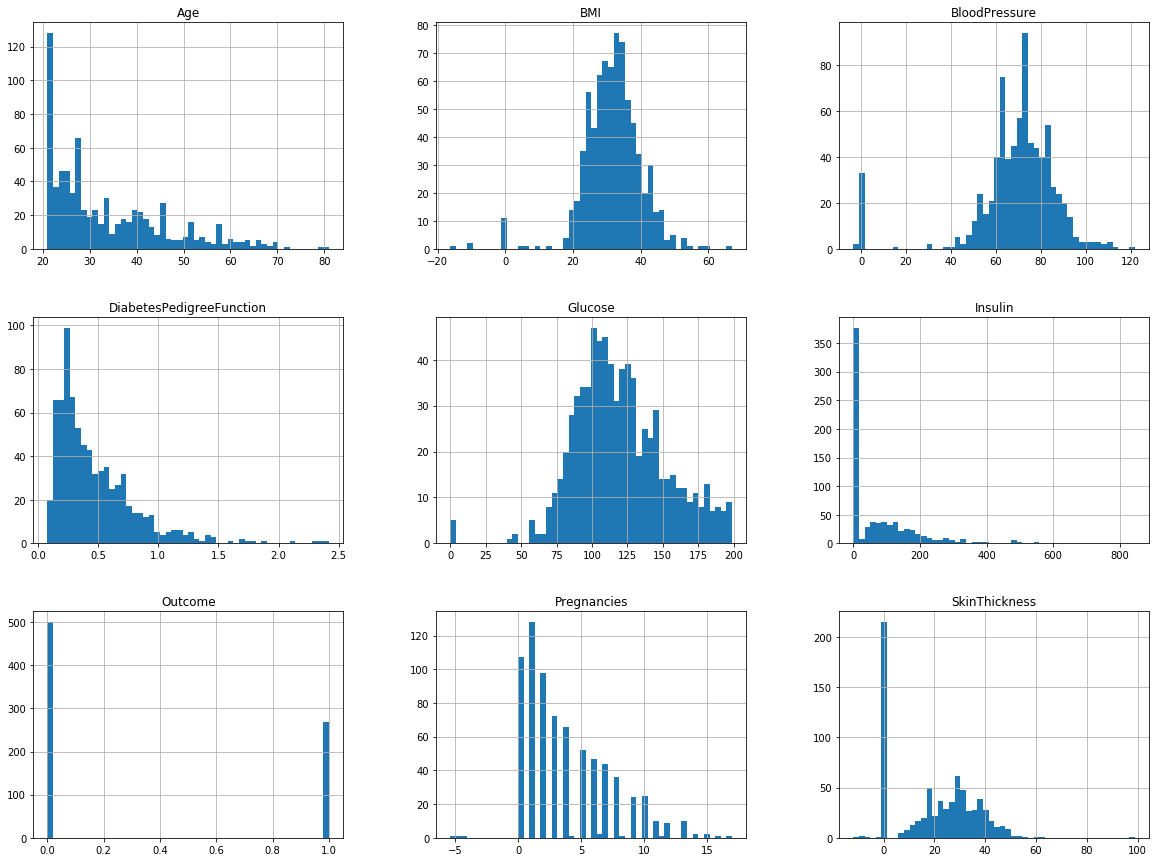

In [3]:
diabetes_data.hist(bins=50, figsize=(20,15))
plt.show()

The features in the dataset are the following:-

In [4]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 742 non-null float64
Glucose                     752 non-null float64
BloodPressure               768 non-null float64
SkinThickness               746 non-null float64
Insulin                     768 non-null float64
BMI                         757 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         749 non-null float64
Outcome                     768 non-null int64
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


Outcome is a boolean representing the final diagnosis, where 0 indicates non-diabetic and 1 indicates diabetic.
Upon inspection, we notice that there are multiple faulty features, like Null values, or semantically incorrect information like negative values or 0 values.

In [5]:
labels = diabetes_data["Outcome"]
data = diabetes_data.iloc[:, 0:8]

def faulty_points(diabetes_data,feature):
    faulty=[]
    for i,value in enumerate(diabetes_data[feature]):
        # Negative values are faulty
        if(value<0):
            faulty.append(i)
        # Null values are faulty
        if(value != value):
            faulty.append(i)
        # Zero values may be faulty depending on the feature
        if(value == 0 and (feature in ['BMI', 'BloodPressure', 'Glucose',
                                       'Insulin', 'SkinThickness'])):
            faulty.append(i)
    return faulty

faulty_indices = {}
for feature in data:
    if (faulty_points(data, feature) != []):
        faulty_indices[feature] = faulty_points(data,feature)

for feature in faulty_indices:
    print(feature, ": ", len(faulty_indices[feature]))

Pregnancies :  29
Glucose :  21
BloodPressure :  35
SkinThickness :  242
Insulin :  374
BMI :  25
Age :  19


Since the number of missing features is comparable to the size of the dataset, we need to impute the missing features. We assume that the missing points can be approximated by the values of the points closest to them based on other features. For this, we use KNN imputation, where k nearest neighbors determine the value to be imputed.

In [6]:
import sys
from impyute.imputation.cs import fast_knn
diabetes_data[diabetes_data < 0] = 0
diabetes_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)
sys.setrecursionlimit(100000)
imputed_data = fast_knn(diabetes_data.values, k=30)
dataset = pd.DataFrame(imputed_data)

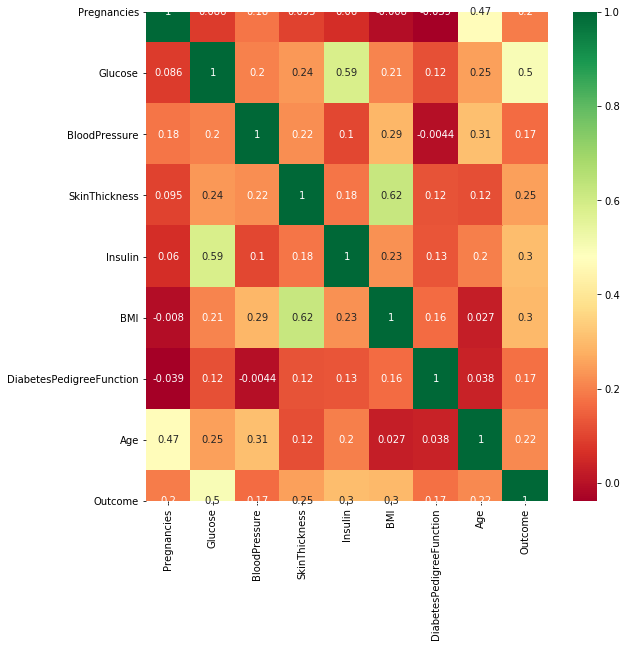

In [7]:
import seaborn as sns
corrmat = diabetes_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(9,9))
g=sns.heatmap(diabetes_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

If we look at the last row of this correlation matrix, we see that glucose and BMI are highly related to the final outcome.
We will now train models based on different algorithms, using different combinations of features.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [9]:
# Feature set 1
features = dataset.iloc[:, 0:8]
# Feature set 2
features2 = dataset.loc[:, [0, 1, 2, 5, 6, 7]]
# Feature set 3
features3 = dataset.loc[:, [0, 1, 5, 6, 7]]
labels = dataset[8]

## Using feature set 1

In [10]:
accuracy = 0
mx = 0
mn = 1
gnb = GaussianNB()
for i in range(1, 100):
    train, test, train_labels, test_labels = train_test_split(features,
                                                          labels,
                                                          test_size=0.20,
                                                          random_state=i)
    
    model = gnb.fit(train, train_labels)
    preds = gnb.predict(test)
    score = (accuracy_score(test_labels, preds))
    accuracy = accuracy + score
    if (score > mx):
        mx = score
    if (score < mn):
        mn = score
print("Scores using Gaussian Naive Bayes algorithm:-")
print("Average accuracy = ", accuracy/99)
print("Min accuracy = ", mn)
print("Max accuracy = ", mx)

Scores using Gaussian Naive Bayes algorithm:-
Average accuracy =  0.7562639380821194
Min accuracy =  0.6948051948051948
Max accuracy =  0.8441558441558441


In [11]:
accuracy = 0
mx = 0
mn = 1
clf = SVC(kernel='linear')
for i in range(1, 100):
    train, test, train_labels, test_labels = train_test_split(features,
                                                          labels,
                                                          test_size=0.20,
                                                          random_state=i)
    
    model = clf.fit(train, train_labels)
    preds = clf.predict(test)
    score = (accuracy_score(test_labels, preds))
    accuracy = accuracy + score
    if (score > mx):
        mx = score
    if (score < mn):
        mn = score
print("Scores using linear SVM")
print("Average accuracy = ", accuracy/99)
print("Min accuracy = ", mn)
print("Max accuracy = ", mx)

Scores using linear SVM
Average accuracy =  0.7662337662337662
Min accuracy =  0.7012987012987013
Max accuracy =  0.8376623376623377


In [12]:
accuracy = 0
mx = 0
mn = 1
l_reg = LogisticRegression(solver = 'lbfgs', max_iter=100000)
for i in range(1, 100):
    train, test, train_labels, test_labels = train_test_split(features,
                                                          labels,
                                                          test_size=0.20,
                                                          random_state=i)
    
    l_reg.fit(train, train_labels)
    l_reg.predict(test)
    score = l_reg.score(test, test_labels)
    accuracy = accuracy + score
    if (score > mx):
        mx = score
    if (score < mn):
        mn = score
print("Scores using Logistic Regression")
print("Average accuracy = ", accuracy/99)
print("Min accuracy = ", mn)
print("Max accuracy = ", mx)

Scores using Logistic Regression
Average accuracy =  0.7695789059425423
Min accuracy =  0.7142857142857143
Max accuracy =  0.8376623376623377


## Using feature set 2

In [13]:
accuracy = 0
mx = 0
mn = 1
gnb = GaussianNB()
for i in range(1, 100):
    train, test, train_labels, test_labels = train_test_split(features2,
                                                          labels,
                                                          test_size=0.20,
                                                          random_state=i)
    
    model = gnb.fit(train, train_labels)
    preds = gnb.predict(test)
    score = (accuracy_score(test_labels, preds))
    accuracy = accuracy + score
    if (score > mx):
        mx = score
    if (score < mn):
        mn = score
print("Scores using Gaussian Naive Bayes algorithm:-")
print("Average accuracy = ", accuracy/99)
print("Min accuracy = ", mn)
print("Max accuracy = ", mx)

Scores using Gaussian Naive Bayes algorithm:-
Average accuracy =  0.7656434474616295
Min accuracy =  0.6948051948051948
Max accuracy =  0.8506493506493507


In [14]:
accuracy = 0
mx = 0
mn = 1
clf = SVC(kernel='linear')
for i in range(1, 100):
    train, test, train_labels, test_labels = train_test_split(features2,
                                                          labels,
                                                          test_size=0.20,
                                                          random_state=i)
    
    model = clf.fit(train, train_labels)
    preds = clf.predict(test)
    score = (accuracy_score(test_labels, preds))
    accuracy = accuracy + score
    if (score > mx):
        mx = score
    if (score < mn):
        mn = score
print("Scores using linear SVM")
print("Average accuracy = ", accuracy/99)
print("Min accuracy = ", mn)
print("Max accuracy = ", mx)

Scores using linear SVM
Average accuracy =  0.7683326774235869
Min accuracy =  0.7012987012987013
Max accuracy =  0.8311688311688312


In [15]:
accuracy = 0
mx = 0
mn = 1
l_reg = LogisticRegression(solver = 'lbfgs', max_iter=100000)
for i in range(1, 100):
    train, test, train_labels, test_labels = train_test_split(features2,
                                                          labels,
                                                          test_size=0.20,
                                                          random_state=i)
    
    l_reg.fit(train, train_labels)
    l_reg.predict(test)
    score = l_reg.score(test, test_labels)
    accuracy = accuracy + score
    if (score > mx):
        mx = score
    if (score < mn):
        mn = score
print("Scores using Logistic Regression")
print("Average accuracy = ", accuracy/99)
print("Min accuracy = ", mn)
print("Max accuracy = ", mx)

Scores using Logistic Regression
Average accuracy =  0.7705627705627707
Min accuracy =  0.7142857142857143
Max accuracy =  0.8441558441558441


## Using feature set 3

In [16]:
accuracy = 0
mx = 0
mn = 1
gnb = GaussianNB()
for i in range(1, 100):
    train, test, train_labels, test_labels = train_test_split(features3,
                                                          labels,
                                                          test_size=0.20,
                                                          random_state=i)
    
    model = gnb.fit(train, train_labels)
    preds = gnb.predict(test)
    score = (accuracy_score(test_labels, preds))
    accuracy = accuracy + score
    if (score > mx):
        mx = score
    if (score < mn):
        mn = score
print("Scores using Gaussian Naive Bayes algorithm:-")
print("Average accuracy = ", accuracy/99)
print("Min accuracy = ", mn)
print("Max accuracy = ", mx)

Scores using Gaussian Naive Bayes algorithm:-
Average accuracy =  0.7733831824740917
Min accuracy =  0.7077922077922078
Max accuracy =  0.8506493506493507


In [17]:
accuracy = 0
mx = 0
mn = 1
clf = SVC(kernel='linear')
for i in range(1, 100):
    train, test, train_labels, test_labels = train_test_split(features3,
                                                          labels,
                                                          test_size=0.20,
                                                          random_state=i)
    
    model = clf.fit(train, train_labels)
    preds = clf.predict(test)
    score = (accuracy_score(test_labels, preds))
    accuracy = accuracy + score
    if (score > mx):
        mx = score
    if (score < mn):
        mn = score
print("Scores using linear SVM")
print("Average accuracy = ", accuracy/99)
print("Min accuracy = ", mn)
print("Max accuracy = ", mx)

Scores using linear SVM
Average accuracy =  0.7681359044995412
Min accuracy =  0.7012987012987013
Max accuracy =  0.8311688311688312


In [18]:
accuracy = 0
mx = 0
mn = 1
l_reg = LogisticRegression(solver = 'lbfgs', max_iter=100000)
for i in range(1, 100):
    train, test, train_labels, test_labels = train_test_split(features3,
                                                          labels,
                                                          test_size=0.20,
                                                          random_state=i)
    
    l_reg.fit(train, train_labels)
    l_reg.predict(test)
    score = l_reg.score(test, test_labels)
    accuracy = accuracy + score
    if (score > mx):
        mx = score
    if (score < mn):
        mn = score
print("Scores using Logistic Regression")
print("Average accuracy = ", accuracy/99)
print("Min accuracy = ", mn)
print("Max accuracy = ", mx)

Scores using Logistic Regression
Average accuracy =  0.7727928637019547
Min accuracy =  0.7142857142857143
Max accuracy =  0.8441558441558441


As we can see, the third feature set, which does not have BloodPressure, SkinThickness and Insulin gives the best results.
Now we will try PCA to eliminate features

# Principle Component Analysis

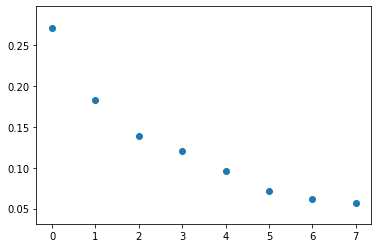

In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

train, test, train_labels, test_labels = train_test_split(features,labels,test_size=0.2)

scaler = StandardScaler()
scaler.fit(train)

train = scaler.transform(train)
test = scaler.transform(test)

pca = PCA(n_components = 8)
pca.fit(train)
ratios = pca.explained_variance_ratio_
plt.scatter(range(len(ratios)), ratios)
plt.show()

The eigenvalues for components 6 and 7 contribute very little variance (~5% each). Hence, we run the model on 6 components and 8 components.

The Naive Bayes classifier assumes that the features are independent. Since PCA returns orthogonal features, the Naive Bayes classifier is used.
## 6 components

In [29]:
accuracy = 0
mx = 0
mn = 1
gnb = GaussianNB()

for i in range(0, 100):
    train, test, train_labels, test_labels = train_test_split(features,labels,test_size=0.2)
    
    scaler = StandardScaler()
    # Fit on training set only.
    scaler.fit(train)
    # Apply transform to both the training set and the test set.
    train = scaler.transform(train)
    test = scaler.transform(test)
    
    pca = PCA(n_components=6)
    pca.fit(train)
    
    gnb.fit(train,train_labels)
    gnb.predict(test)
    
    score = gnb.score(test,test_labels)
    accuracy = accuracy + score
    
    if (score > mx):
        mx = score
    if (score < mn):
        mn = score

print("Average accuracy = ", accuracy/100)
print("Min accuracy = ", mn)
print("Max accuracy = ", mx)

Average accuracy =  0.7544805194805195
Min accuracy =  0.6688311688311688
Max accuracy =  0.8506493506493507


## 8 components

In [30]:
accuracy = 0
mx = 0
mn = 1
gnb = GaussianNB()

for i in range(0, 100):
    train, test, train_labels, test_labels = train_test_split(features,labels,test_size=0.2)
    
    scaler = StandardScaler()
    # Fit on training set only.
    scaler.fit(train)
    # Apply transform to both the training set and the test set.
    train = scaler.transform(train)
    test = scaler.transform(test)
    
    pca = PCA(n_components=6)
    pca.fit(train)
    
    gnb.fit(train,train_labels)
    gnb.predict(test)
    
    score = gnb.score(test,test_labels)
    accuracy = accuracy + score
    
    if (score > mx):
        mx = score
    if (score < mn):
        mn = score

print("Average accuracy = ", accuracy/100)
print("Min accuracy = ", mn)
print("Max accuracy = ", mx)

Average accuracy =  0.7551948051948051
Min accuracy =  0.6428571428571429
Max accuracy =  0.8506493506493507


# Conclusion
A maximum average accuracy of 77.34% was obtained when 5 features were used with Gaussian Naive Bayes classifier.

## Authors
- Deep Inder Mohan 
- Arjun Pilikudale
- Anirudh C